In [40]:
from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import datetime 
import numpy as np
import json
import tensorflow as tf
import jpype
from konlpy.tag import Okt
from IPython.core.interactiveshell import InteractiveShell
from pandas import DataFrame as df
InteractiveShell.ast_node_interactivity = 'all'
os.chdir("C:/Users/windd/pythondata")
%matplotlib inline
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [335]:
# 기존 마스터 데이터

data = pd.read_excel('수료/master_data_real.xlsx')

# 과거성공프로젝트수 수정 마스터 데이터

data_new = pd.read_excel('수료/master_data22.xlsx')

# 펀딩시작요일 원핫인코딩

data = pd.concat([data,pd.get_dummies(data['펀딩시작요일'])],axis=1)
data_new = pd.concat([data_new,pd.get_dummies(data_new['펀딩시작요일'])],axis=1)

In [336]:
rdata = pd.read_excel('수료/가독성지수3.xlsx')
data = pd.merge(data,rdata, on='제목')

In [337]:
# 펀딩기간 형성 및 정수로 변환

data['펀딩기간'] = (data['펀딩마감날짜'] - data['펀딩시작날짜'])
data['펀딩기간'] = data.펀딩기간.dt.days

# 펀딩기간 0인거 제거

data = data[data['펀딩기간']!=0]

# 일펀딩금액과 일글수 파생변수 생성

data['일펀딩금액'] = data.목표금액/data.펀딩기간
data['일글수'] = data.글업데이트수/data.펀딩기간

# 파생변수

data['문장당강조'] = data.Strong/data.문장수
data['문장당밑줄']= data.Under/data.문장수
data['문장지수'] = data.문장당강조 + data.문장당밑줄

In [338]:
# 이렇게 하는게 더 값이 잘나와서 그냥 이렇게 하자
# 다른 방법있으면 적용해봐도 될듯

data['과거프로젝트수'] = data.과거프로젝트수 + 1


data = data[(data.과거성공프로젝트수/data.과거프로젝트수)<=1]

data['성공비율'] = data.과거성공프로젝트수/data.과거프로젝트수

In [339]:
data = data[data['달성률']<25000]

data = data[data.일펀딩금액>0]

# 무한대값 제거
data = data.replace([np.inf, -np.inf], np.nan)
data = data[~(data.가독성_제목.isnull())]

# 성공비율

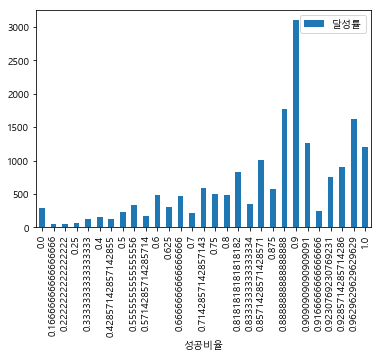

In [340]:
# 중간에 낮은값들 제거해주자

data.pivot_table(index='성공비율',aggfunc='mean',values='달성률').plot(kind='bar')

In [341]:
# 이런것들 지우고 좀 괜찮게 봐보자

data[data.성공비율==0.9].달성률

424       651
3087    11520
4178      118
4625       11
4635     3207
Name: 달성률, dtype: int64

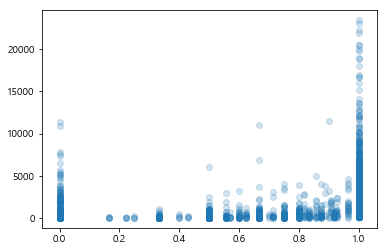

In [342]:
plt.scatter(data.성공비율, data.달성률, alpha=0.2)

# 이미지수

In [343]:
data.이미지수.describe()

count    5277.000000
mean       35.780557
std        20.732839
min         0.000000
25%        22.000000
50%        32.000000
75%        46.000000
max       279.000000
Name: 이미지수, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1eda0807cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eda85a96a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eda0807b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1eda85a9f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eda8597400>],
 'means': []}

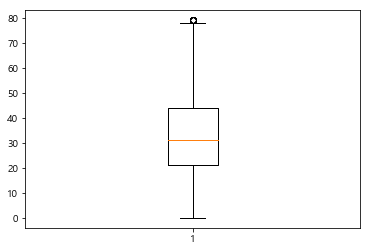

In [344]:
# 이미지수 이상치 제거해주면 괜찮게 보임

data = data[data['이미지수']<80]
plt.boxplot(data.이미지수)

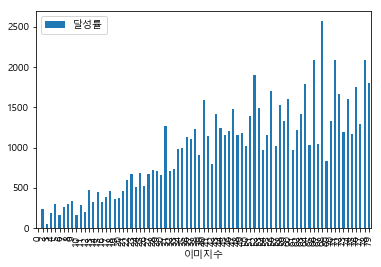

In [345]:
data.pivot_table(index='이미지수',aggfunc='mean',values='달성률').plot(kind='bar') 

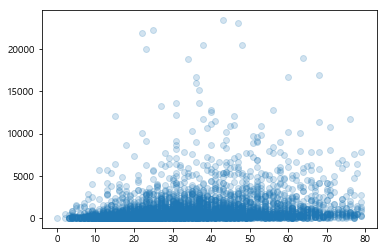

In [346]:
plt.scatter(data.이미지수, data.달성률,alpha=0.2)

# 비디오수

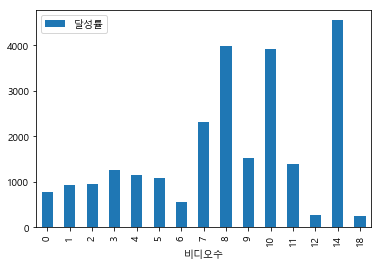

In [347]:
# 어떻게 그룹화 할 수 없을까?

data.pivot_table(index='비디오수',aggfunc='mean',values='달성률').plot(kind='bar')

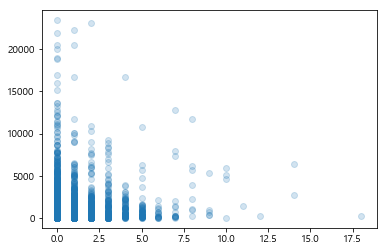

In [348]:
plt.scatter(data.비디오수, data.달성률,alpha=0.2)

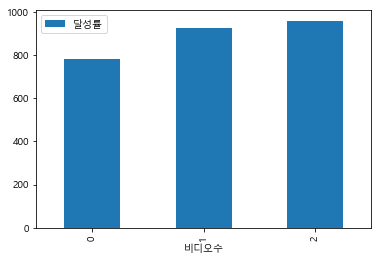

In [89]:
# 너무 평이해지지 않나싶음


plt.boxplot(data.비디오수)
data = data[data['비디오수']<3]
data.pivot_table(index='비디오수',aggfunc='mean',values='달성률').plot(kind='bar')

# 와디즈 팔로워수

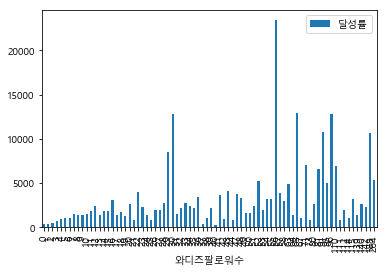

In [349]:
data.pivot_table(index='와디즈팔로워수',aggfunc='mean',values='달성률').plot(kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x1eda8ef9940>,
 'caps': [<matplotlib.lines.Line2D at 0x1eda8efe240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eda8ef97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eda8efeac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eda8efef28>],
 'means': []}

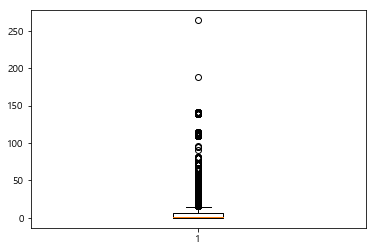

In [350]:
plt.boxplot(data.와디즈팔로워수)

# 일글수, 글업데이트수

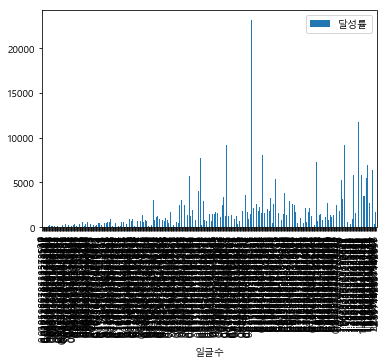

In [351]:
# 몇개 지워보자

data.pivot_table(index='일글수',aggfunc='mean',values='달성률').plot(kind='bar')

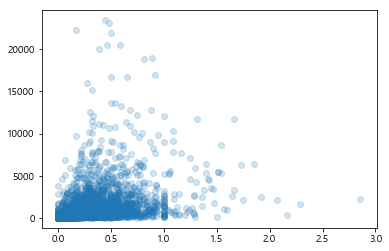

In [352]:
plt.scatter(data.일글수, data.달성률, alpha=0.2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eda94eb630>,
 'caps': [<matplotlib.lines.Line2D at 0x1eda94ebef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eda94eb4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eda94f37b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eda94f3be0>],
 'means': []}

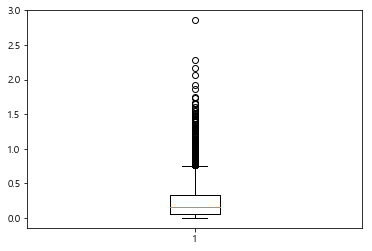

In [353]:
plt.boxplot(data.일글수)

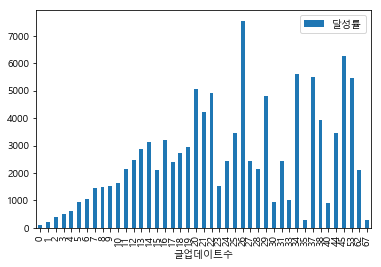

In [354]:
data.pivot_table(index='글업데이트수',aggfunc='mean',values='달성률').plot(kind='bar')

In [279]:
data[data['글업데이트수']==35]

,Unnamed: 0,url,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,서포터수,좋아요수,글업데이트수,...,문장수_제목,가독성_제목,가독성_제목.1,펀딩기간,일펀딩금액,일글수,문장당강조,문장당밑줄,문장지수,성공비율
699,5139,https://www.wadiz.kr/web/campaign/detail/16964,골드래빗(주),2018-02-28,2018-04-13,Wed,10000000,162,148,35,...,2,63.575962,6.006538,44,227272.727273,0.795455,0.493671,0.386076,0.879747,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1eda8a18780>,
 'caps': [<matplotlib.lines.Line2D at 0x1eda8a1b080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eda8a18630>],
 'medians': [<matplotlib.lines.Line2D at 0x1eda8a1b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eda8a1bda0>],
 'means': []}

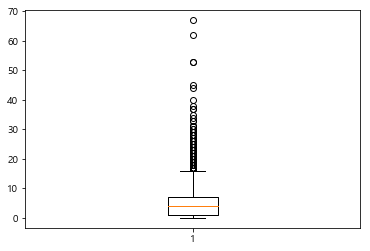

In [355]:
plt.boxplot(data.글업데이트수)

# 앵콜펀딩, 인스타존재여부

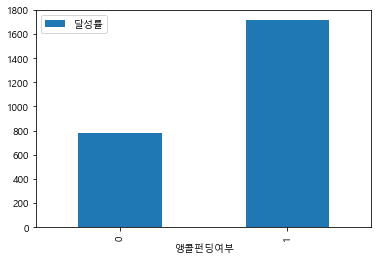

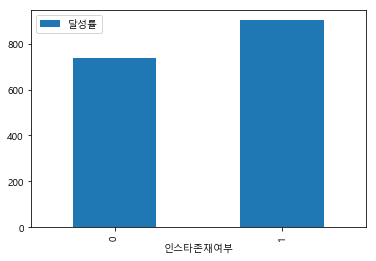

In [230]:
data.pivot_table(index='앵콜펀딩여부',aggfunc='mean',values='달성률').plot(kind='bar')
data.pivot_table(index='인스타존재여부',aggfunc='mean',values='달성률').plot(kind='bar')

# 일펀딩금액

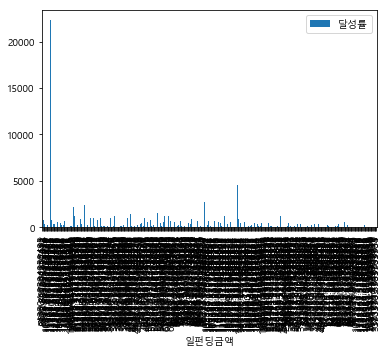

In [118]:
data.pivot_table(index='일펀딩금액',aggfunc='mean',values='달성률').plot(kind='bar')

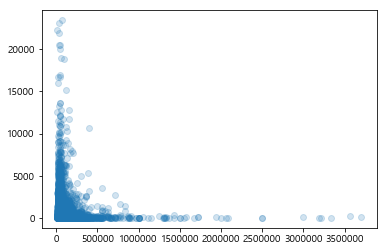

In [356]:
# 5만 넘어가는지 아닌지
# 0에서 몇 정도~ 
# 몇 ~ 5만

plt.scatter(data.일펀딩금액, data.달성률,alpha=0.2)

# 목표금액

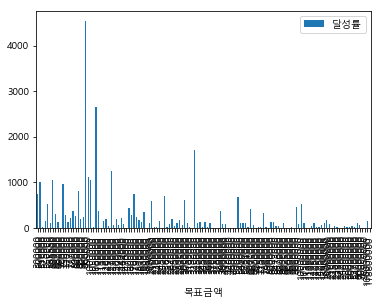

In [271]:
data.pivot_table(index='목표금액',aggfunc='mean',values='달성률').plot(kind='bar')

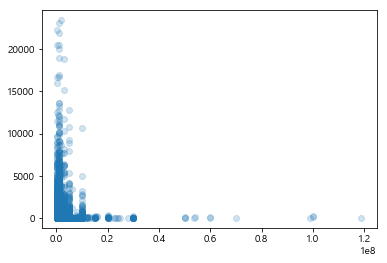

In [357]:
plt.scatter(data.목표금액, data.달성률, alpha=0.2)

# 펀딩요일

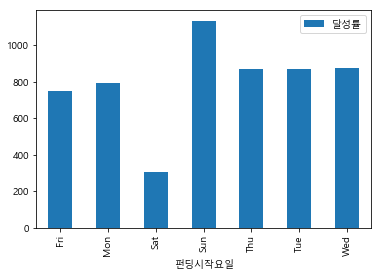

In [119]:
data.pivot_table(index='펀딩시작요일',aggfunc='mean',values='달성률').plot(kind='bar')

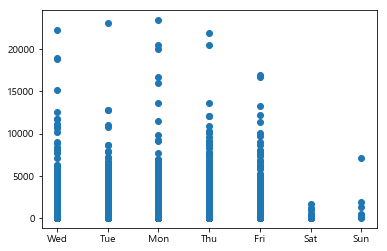

In [269]:
plt.scatter(data.펀딩시작요일, data.달성률)

# 카테고리

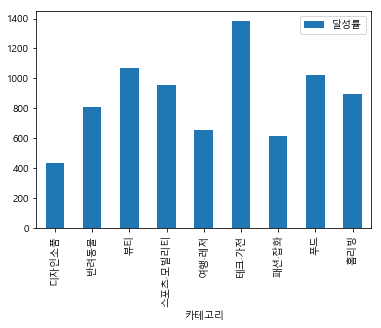

In [120]:
data.pivot_table(index='카테고리',aggfunc='mean',values='달성률').plot(kind='bar')

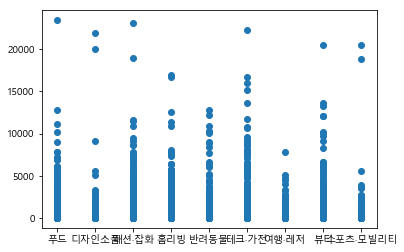

In [270]:
plt.scatter(data.카테고리, data.달성률)

# 리워드종류수

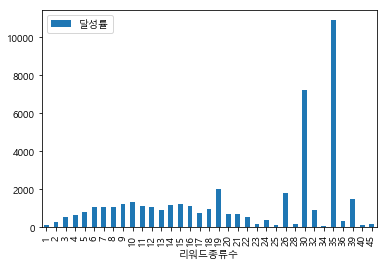

In [358]:
data.pivot_table(index='리워드종류수',aggfunc='mean',values='달성률').plot(kind='bar')

In [359]:
# 아래의 데이터들은 하나의 값으로 크게 만든 데이터들이 있음

data = data[(data.리워드종류수!=30) & (data.리워드종류수 !=26) & (data.리워드종류수 !=35) & (data.리워드종류수 !=32) & (data.리워드종류수 !=39) &
            (data.리워드종류수 !=19) & (data.리워드종류수 !=35) & (data.리워드종류수 !=36) & (data.리워드종류수 !=24)]

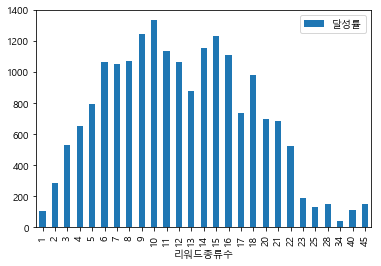

In [360]:
data.pivot_table(index='리워드종류수',aggfunc='mean',values='달성률').plot(kind='bar')

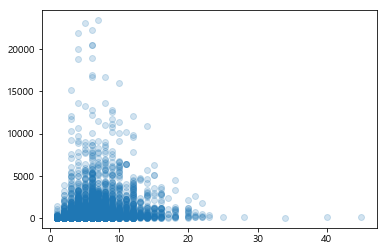

In [361]:
# 그룹화의 필요성

plt.scatter(data.리워드종류수, data.달성률,alpha=0.2)

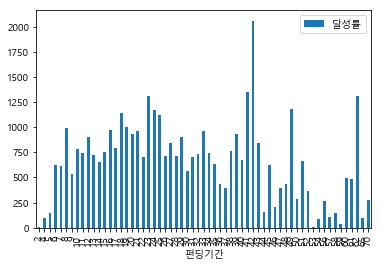

In [362]:
data.pivot_table(index='펀딩기간',aggfunc='mean',values='달성률').plot(kind='bar')

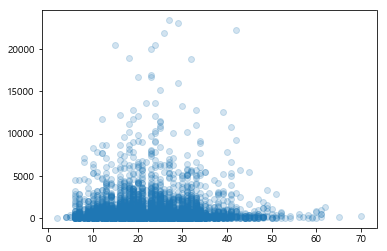

In [363]:
plt.scatter(data.펀딩기간, data.달성률, alpha= 0.2)

# 마감배송차이

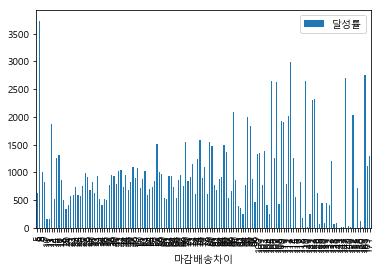

In [289]:
data.pivot_table(index='마감배송차이',aggfunc='mean',values='달성률').plot(kind='bar')

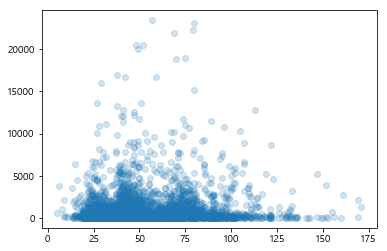

In [364]:
data = data[(data.마감배송차이>0) & (data.마감배송차이<300)]

plt.scatter(data.마감배송차이, data.달성률,alpha=0.2)

In [318]:
data =data[data.달성률<5000]

# 텍스트적 요소

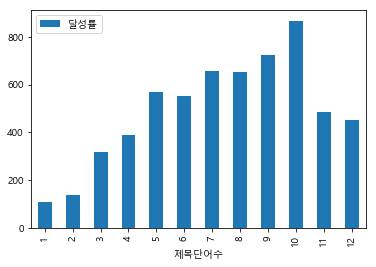

In [319]:
data.pivot_table(index='제목단어수',aggfunc='mean',values='달성률').plot(kind='bar')

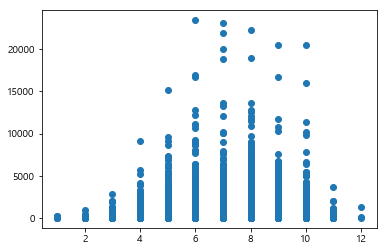

In [365]:
plt.scatter(data.제목단어수, data.달성률)

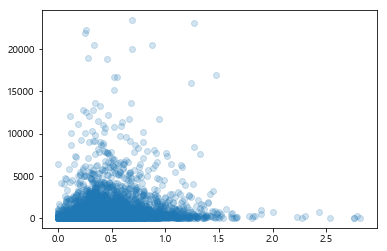

In [366]:
plt.scatter(data.문장당강조, data.달성률,alpha=0.2)

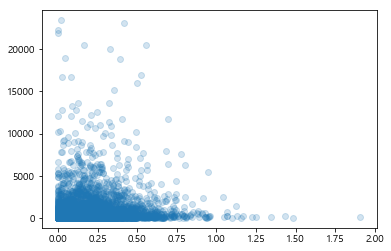

In [367]:
plt.scatter(data.문장당밑줄, data.달성률,alpha=0.2)

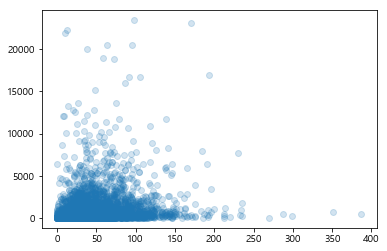

In [368]:
plt.scatter(data.Strong, data.달성률,alpha=0.2)

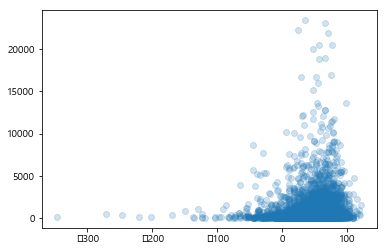

In [369]:
plt.scatter(data.가독성_제목, data.달성률,alpha=0.2)

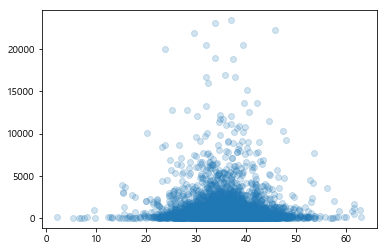

In [370]:
plt.scatter(data.가독성, data.달성률,alpha=0.2)

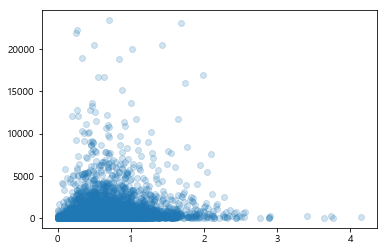

In [371]:
plt.scatter(data.문장지수, data.달성률, alpha=0.2)

In [ ]:
rdata = pd.read_excel('수료/리워드_조작.xlsx')
rdata = rdata[['url','리워드종류수']]
data = data.drop(columns=['리워드종류수'])
data = pd.merge(data,rdata,on='url')

In [161]:
data.columns

Index(['Unnamed: 0', 'url', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액',
       '서포터수', '좋아요수', '글업데이트수', '댓글수', '리워드종류수', '이미지수', '비디오수', '배송시작날짜',
       '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수',
       '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2',
       '제목단어수', '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가', '근원물가', '생활물가', '실질GDP성장률',
       '제목', '달성액', '요약글', '카테고리', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', '분기', '와디즈기사개수', '크라우드펀딩기사개수', 'PER',
       'PBR', 'ROE', 'EBIT', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       '음절수_제목', '단어수_제목', '문장수_제목', '가독성_제목', '가독성_제목.1', '펀딩기간', '일펀딩금액',
       '일글수', '문장당강조', '문장당밑줄', '문장지수', '성공비율'],
      dtype='object')

In [378]:
# 필요한 컬럼만 추출

total = data[['목표금액', '리워드종류수', '이미지수', '비디오수', 
       '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수',
       '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2',
       '제목단어수', '달성률', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       '음절수_제목', '단어수_제목', '문장수_제목', '가독성_제목', '가독성_제목.1', '펀딩기간', '일펀딩금액',
       '일글수', '문장당강조', '문장당밑줄', '문장지수', '성공비율']]




# 일단 하면 성능좋아져서 했음


In [19]:
# 달성률을 너무 계속 자르면 좋진 않을거 같고 3만정도 자르면 일단
# 70 -> 72%로 정확도 향상됐음

total = total[total['달성률']<30000]

In [208]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5301
Data columns (total 50 columns):
목표금액         5062 non-null int64
글업데이트수       5062 non-null int64
리워드종류수       5062 non-null int64
이미지수         5062 non-null int64
비디오수         5062 non-null int64
마감배송차이       5062 non-null int64
인스타존재여부      5062 non-null int64
인스타팔로워수      5062 non-null int64
와디즈팔로워수      5062 non-null int64
과거프로젝트수      5062 non-null int64
과거성공프로젝트수    5062 non-null int64
앵콜펀딩여부       5062 non-null int64
음절수          5062 non-null int64
단어수          5062 non-null int64
문장수          5062 non-null int64
Strong       5062 non-null int64
Under        5062 non-null int64
가독성          5062 non-null float64
가독성2         5062 non-null float64
제목단어수        5062 non-null int64
펀딩성공여부       5062 non-null int64
달성률          5062 non-null int64
디자인소품        5062 non-null int64
반려동물         5062 non-null int64
뷰티           5062 non-null int64
스포츠·모빌리티     5062 non-null int64
여행·레저        5062 non-null int6

In [198]:
data.isnull().sum()

Unnamed: 0    0
url           0
메이커           0
펀딩시작날짜        0
펀딩마감날짜        0
펀딩시작요일        0
목표금액          0
서포터수          0
좋아요수          0
글업데이트수        0
댓글수           0
리워드종류수        0
이미지수          0
비디오수          0
배송시작날짜        0
마감배송차이        0
인스타존재여부       0
인스타팔로워수       0
와디즈팔로워수       0
과거프로젝트수       0
과거성공프로젝트수     0
앵콜펀딩여부        0
음절수           0
단어수           0
문장수           0
Strong        0
Under         0
가독성           0
가독성2          0
제목단어수         0
             ..
테크·가전         0
패션·잡화         0
푸드            0
홈리빙           0
분기            0
와디즈기사개수       0
크라우드펀딩기사개수    0
PER           0
PBR           0
ROE           0
EBIT          0
Fri           0
Mon           0
Sat           0
Sun           0
Thu           0
Tue           0
Wed           0
음절수_제목        0
단어수_제목        0
문장수_제목        0
가독성_제목        0
가독성_제목.1      0
펀딩기간          0
일펀딩금액         0
일글수           0
문장당강조         0
문장당밑줄         0
문장지수          0
성공비율          0
Length: 76, dtype: int64

In [10]:
total_list = total.columns

<Figure size 2880x2880 with 0 Axes>

(array([240., 849., 630., 328., 134.,  57.,  14.,  11.,   5.,   2.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <a list of 10 Patch objects>)

Text(0.5,0,'이미지수')

(array([1.853e+03, 3.230e+02, 6.200e+01, 1.900e+01, 5.000e+00, 5.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'비디오수')

(array([1.100e+01, 1.000e+00, 0.000e+00, 0.000e+00, 6.410e+02, 1.566e+03,
        4.900e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-332. , -257.7, -183.4, -109.1,  -34.8,   39.5,  113.8,  188.1,
         262.4,  336.7,  411. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'마감배송차이')

(array([  1.,  14.,  25., 194., 745., 831., 363.,  75.,  17.,   5.]),
 array([ 6.62333333, 12.26252971, 17.90172608, 23.54092245, 29.18011883,
        34.8193152 , 40.45851157, 46.09770794, 51.73690432, 57.37610069,
        63.01529706]),
 <a list of 10 Patch objects>)

Text(0.5,0,'가독성')

(array([  10.,   78.,  493., 1023.,  528.,  105.,   17.,   12.,    2.,
           2.]),
 array([ 7.23397619,  8.77924524, 10.32451429, 11.86978333, 13.41505238,
        14.96032143, 16.50559048, 18.05085952, 19.59612857, 21.14139762,
        22.68666667]),
 <a list of 10 Patch objects>)

Text(0.5,0,'가독성2')

(array([778., 868., 383., 154.,  51.,  17.,  12.,   6.,   0.,   1.]),
 array([  0. ,  29.9,  59.8,  89.7, 119.6, 149.5, 179.4, 209.3, 239.2,
        269.1, 299. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'Strong')

(array([1.544e+03, 5.490e+02, 1.250e+02, 3.900e+01, 1.000e+01, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  24.3,  48.6,  72.9,  97.2, 121.5, 145.8, 170.1, 194.4,
        218.7, 243. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'Under')

(array([5.730e+02, 1.000e+00, 3.000e+00, 2.900e+01, 3.000e+00, 1.340e+02,
        6.300e+01, 3.000e+01, 4.600e+01, 1.388e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'성공비율')

(array([2.077e+03, 8.000e+01, 4.500e+01, 3.400e+01, 5.000e+00, 8.000e+00,
        1.100e+01, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'와디즈팔로워수')

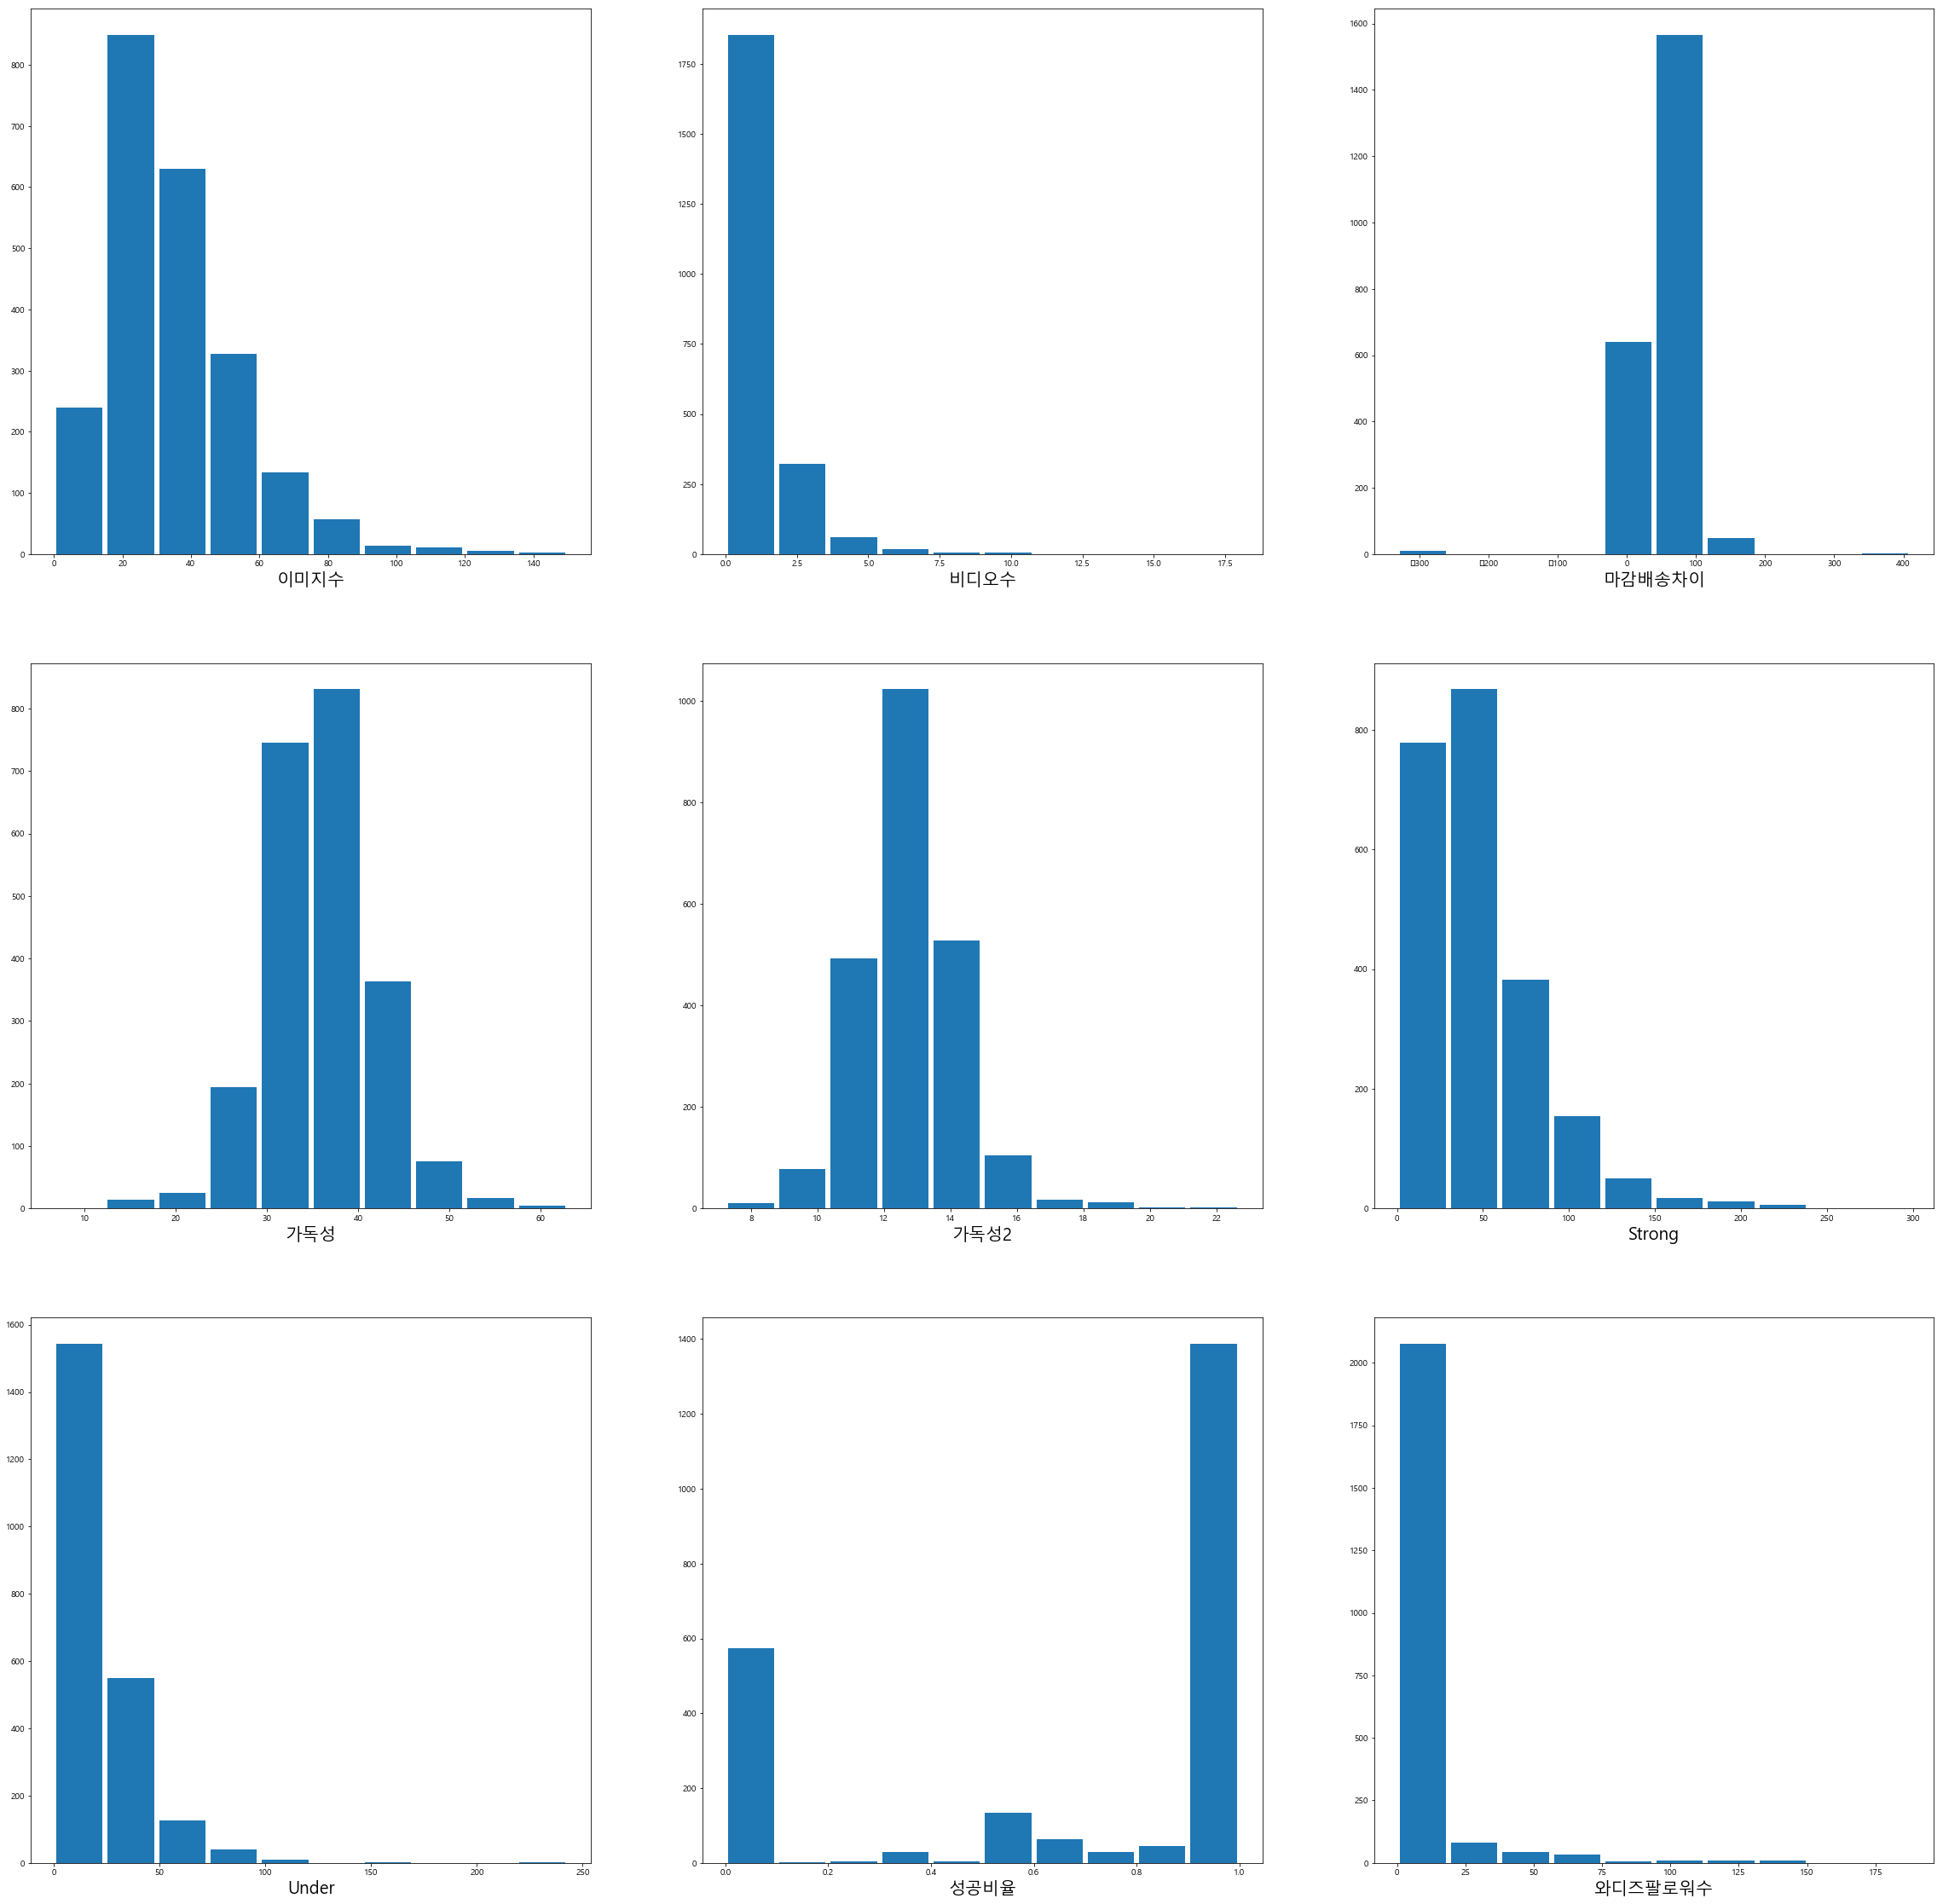

In [72]:
plt.figure(figsize=(40,40))

for i in range(1,10,1):
    plt.subplot(330+i)
    plt.hist(total[total_list[i]],rwidth=0.9)
    plt.xlabel(total_list[i],fontsize=20)

In [379]:
# 달성률 범주생성
# 현재 범주는 임의의 범주이며
# 여러가지 시도하면서 정확도를 봐야할듯

total.index = list(range(len(total)))
total_target = total

target_list = []

for i in range(len(total_target)):
    if total_target.달성률[i] < 100:
        target_list.append(0)
    elif total_target.달성률[i] < 700:
        target_list.append(1)     
    
    else:
        target_list.append(3)
    
total_target['타겟'] = target_list
total_target.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')
total_data = total_target.drop(columns = ['달성률'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,달성률
타겟,
0,1094
1,2483
3,1451


In [380]:
X = total_data.drop(columns=['타겟'])
y = total_data.타겟

# 학습용/테스트용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train, y_train)

rf.score(X_train, y_train)
rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

import sklearn.metrics as mt

mt.accuracy_score( y_pred, y_test)
mt.confusion_matrix(y_pred, y_test)

pd.DataFrame({'속성명':total_data.columns[:-1], '중요도':rf.feature_importances_}).sort_values('중요도',ascending=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

1.0

0.7760106030483764

0.7760106030483764

array([[279,  36,   1],
       [ 39, 627, 159],
       [  1, 102, 265]], dtype=int64)

,속성명,중요도
41,일글수,0.165920
45,성공비율,0.149631
7,와디즈팔로워수,0.067752
40,일펀딩금액,0.038311
2,이미지수,0.033165
12,문장수,0.027970
11,단어수,0.027926
10,음절수,0.027012
4,마감배송차이,0.024790
15,가독성,0.024365


In [209]:
X = total.drop(columns=['달성률'])
y = total.달성률
# 학습용/테스트용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100)



from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, criterion = 'mse', 
                          random_state=1, n_jobs = -1)

rf.fit(X_train, y_train)

rf.score(X_train, y_train)
rf.score(X_test, y_test)

y_pred =rf.predict(X_test)

# 분석결과 평가

import sklearn.metrics as mt

# MSE 계산
mse = mt.mean_squared_error(y_test, y_pred)
print('MSE:',format(mse,'.3f'))

# RMSE 계산
rmse = np.sqrt(mse)
print('RMSE:',format(rmse,'.3f'))

# 결정계수 계산

r2 = mt.r2_score(y_test, y_pred) # r2_score(y_test, y_pred)
print('R2:',format(r2,'.3f'))
pd.DataFrame({'속성명':total.columns.drop(['달성률']), '중요도':rf.feature_importances_}).sort_values('중요도',ascending=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

0.9121861857491667

0.3891267275735715

MSE: 2136463.731
RMSE: 1461.665
R2: 0.389


,속성명,중요도
1,글업데이트수,0.200854
8,와디즈팔로워수,0.131054
43,일펀딩금액,0.065246
44,일글수,0.038800
9,과거프로젝트수,0.034443
46,문장당밑줄,0.025822
18,가독성2,0.025753
5,마감배송차이,0.024753
45,문장당강조,0.024666
3,이미지수,0.024154


Index(['리워드종류수', '이미지수', '비디오수', '마감배송차이', '가독성', '가독성2', 'Strong', 'Under',
       '성공비율', '와디즈팔로워수', '과거프로젝트수', '앵콜펀딩여부', '문장수', '단어수', '음절수', '제목단어수',
       '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저', '테크·가전', '패션·잡화', '푸드',
       '홈리빙', '펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', '문장지수', '품질'],
      dtype='object')

In [128]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid


{'n_estimators': [1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 35, 60, 85, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [129]:

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [130]:
rf_random.score(X_train, y_train)
rf_random.score(X_test, y_test)

y_pred = rf_random.predict(X_test)

import sklearn.metrics as mt

mt.accuracy_score( y_pred, y_test)
mt.confusion_matrix(y_pred, y_test)

pd.DataFrame({'속성명':total_data.columns[:-1], '중요도':rf_random.feature_importances_}).sort_values('중요도',ascending=False)

0.9813311688311688

0.7173501577287066

0.7173501577287066

array([[308,  22,   3,   0,   0],
       [ 40, 724, 189,  74,   2],
       [  2,  31,  57,  51,   0],
       [  0,  10,  16,  48,   8],
       [  0,   0,   0,   0,   0]], dtype=int64)

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [457]:
import xgboost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_clf.score(X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.7058111380145279

In [458]:
# gridsearch

from sklearn.model_selection import GridSearchCV

xgb_params = {'n_estimators':[100,200],
             'learning_rate':[0.1,0.2]}

grid_xgb = GridSearchCV(xgb_clf, param_grid = xgb_params,
               cv= 5, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

grid_xgb.score(X_test,y_test)
grid_xgb.best_params_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train

0.711864406779661

{'learning_rate': 0.2, 'n_estimators': 100}